# Importing neccesary libraries

In [2]:
import pandas as pd
import numpy as np


# Importing dataset

In [3]:
df1=pd.read_csv("bigdatamart_train.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Identify type of problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

As we have to predict model and find out sales of each model which is continous values so it is a regression problem

In [4]:
#lets chk the shape of data
df1.shape

(8523, 12)

There are 8523 rows and 12 columns

In [5]:
#describe the dataset 
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

In [6]:
#datatypes of each column
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales.

and rest is integer data type : Outlet_Establishment_Year,

Item_Outlet_Sales is a target variable.

In [7]:
#lets chk the null values present in dataset
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two columns are having missing data in it.

1.Item_Weight : 1463 rows are missing
    
2.Outlet_Size : 2410 rows are missing

# EDA  Visualization(Uni-variate Analysis)

Uni variate analysis works with only one variable, hence it is called uni variate.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
#taking columns for univariate analysis
u = df1[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]

# Distplot

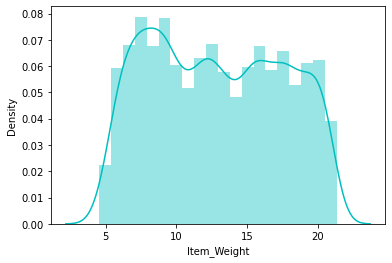

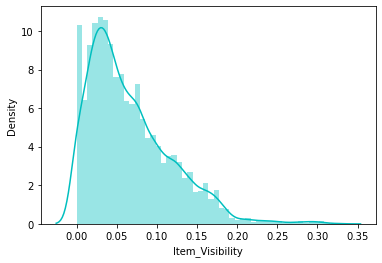

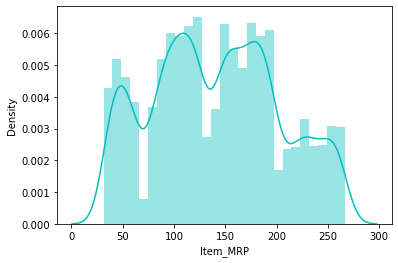

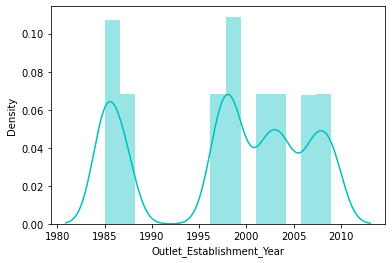

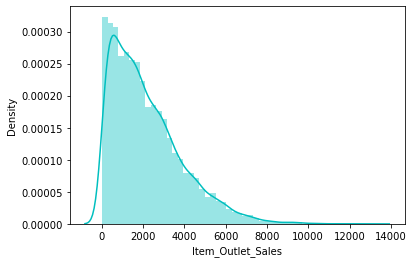

In [11]:
for i in u:
    plt.figure()
    sns.distplot(df1[i],color='c')

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight, Item_MRP and Item_Visibility is having skewness in it.

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it and Item_Outlet_Sales is a target variable

# Histograms

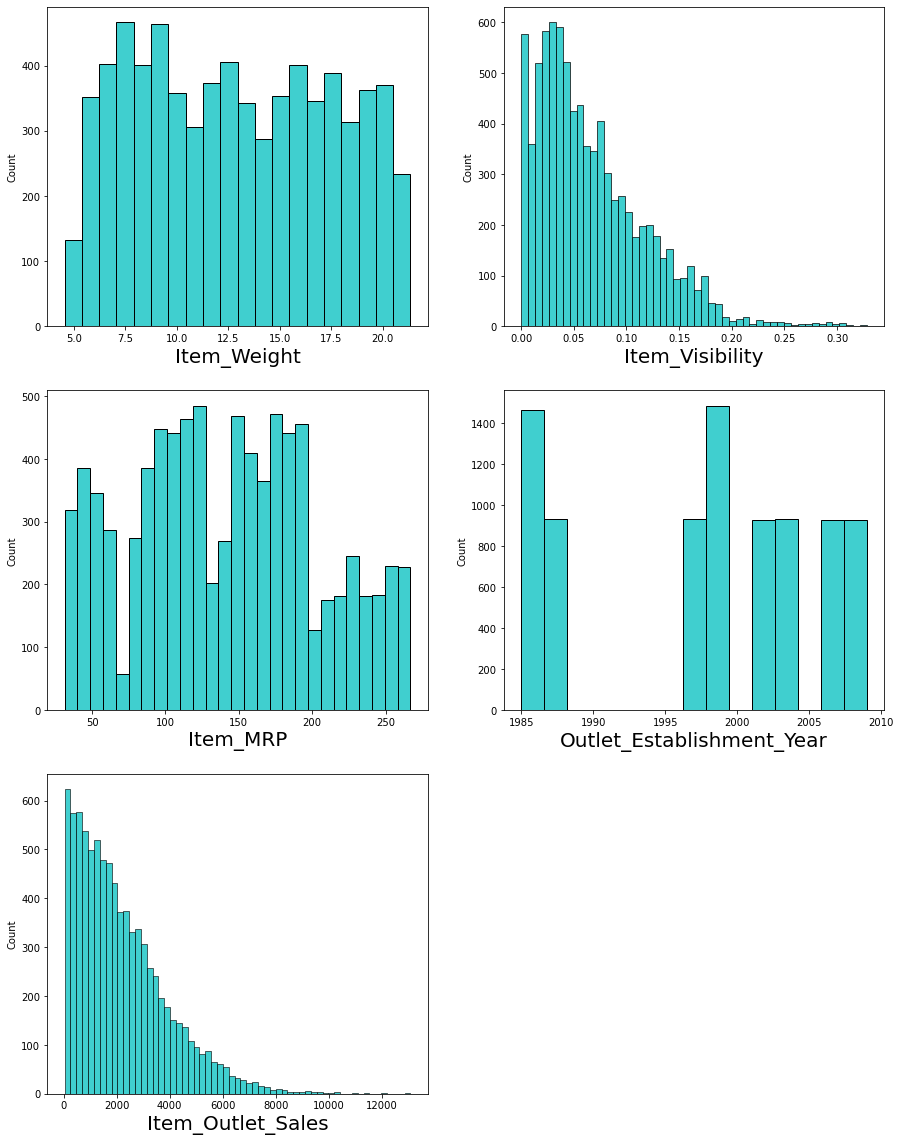

In [12]:
plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for i in u:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(u[i], color = 'c')
        plt.xlabel(i,fontsize=20)
        
    plotnumber += 1
plt.show()

# Bi-variate Analysis

Bi variate analysis is works with two variables.

In [13]:
df_b=df1.drop(['Outlet_Location_Type'], axis=1)
df_b=df1.drop(['Outlet_Type'], axis=1)
df_b=df1.drop(['Outlet_Size'], axis=1)

t is not possible inscatter plot to every variable relationship with target variable as it is not in proper form, so drop that column only for bivariate visualization.

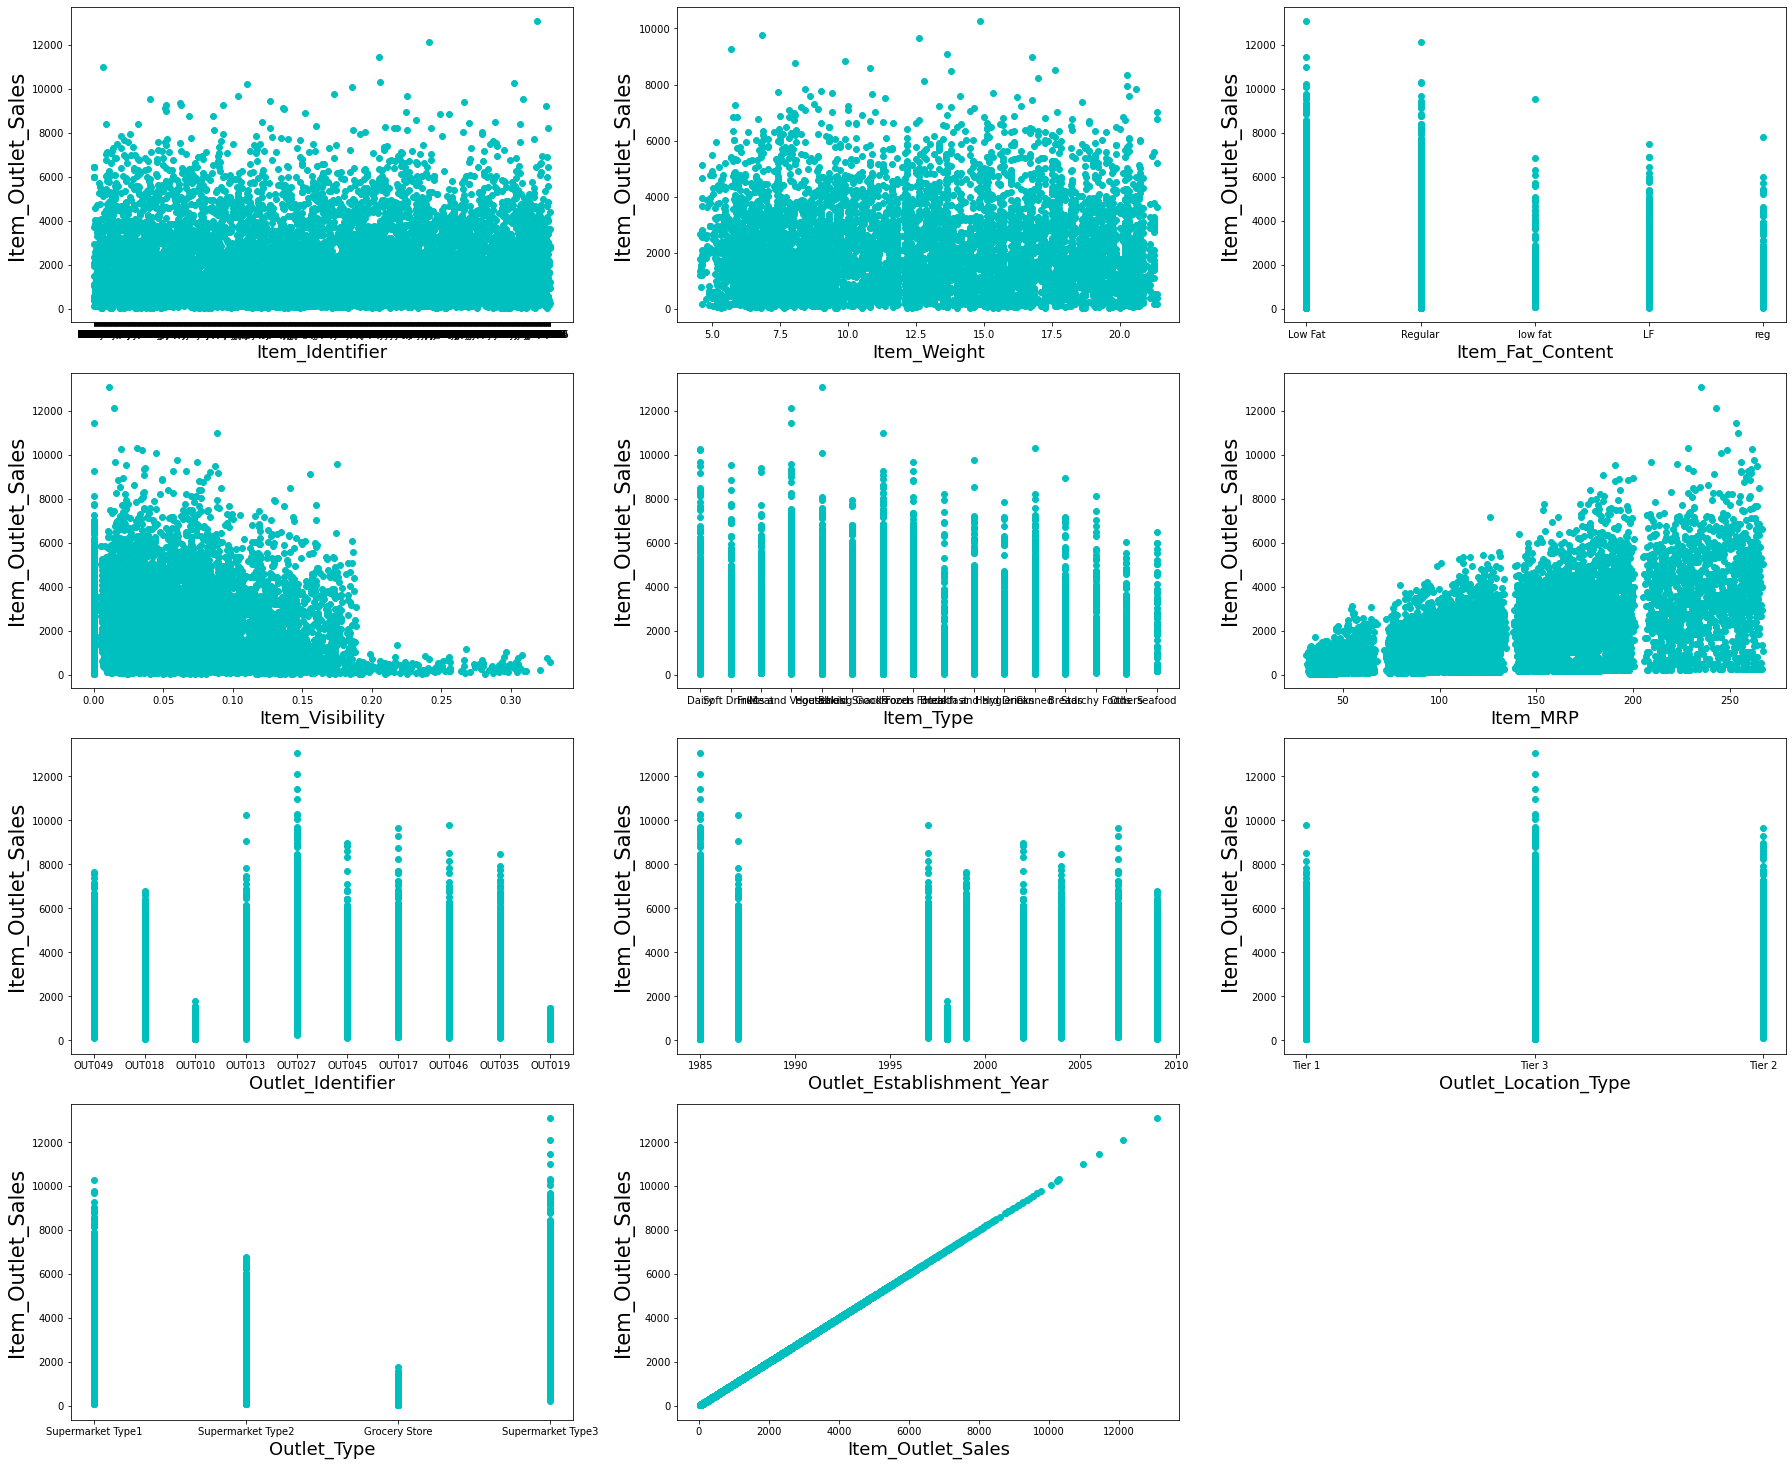

In [14]:


plt.figure(figsize = (25,25), facecolor = 'white')
plotnumber = 1

for i in df_b:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df_b[i],df_b['Item_Outlet_Sales'], color='c')
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Item_Outlet_Sales', fontsize=21)
    plotnumber += 1
plt.tight_layout()

# Multi-variate Analysis

In [15]:
#lets chk the correlation
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

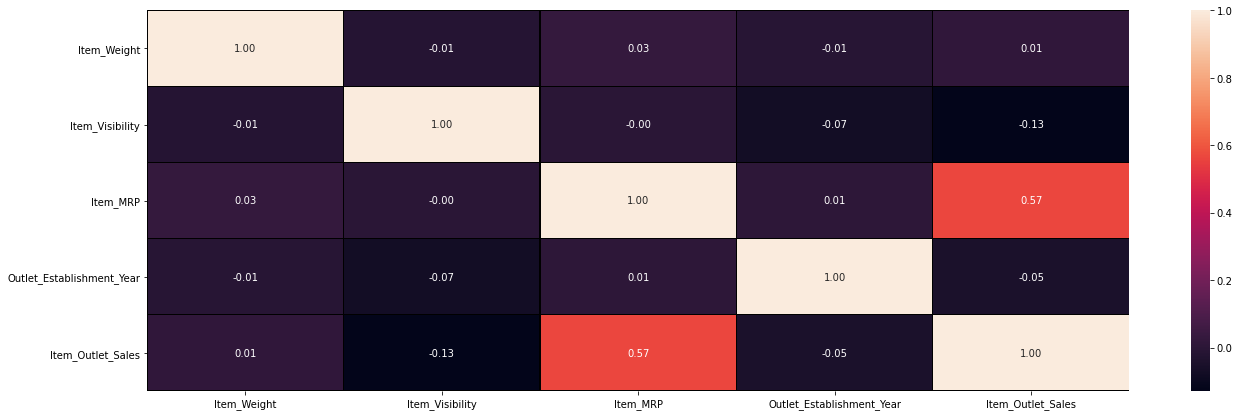

In [16]:
# finding the corelation by heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

As shown in heatmap Item_Outlet_Sales and Item_MRP are strongly correlated with each other and Item_weight column is weekly correlate with targate variable.

Find out which columns are positively and negatively correlated with each other

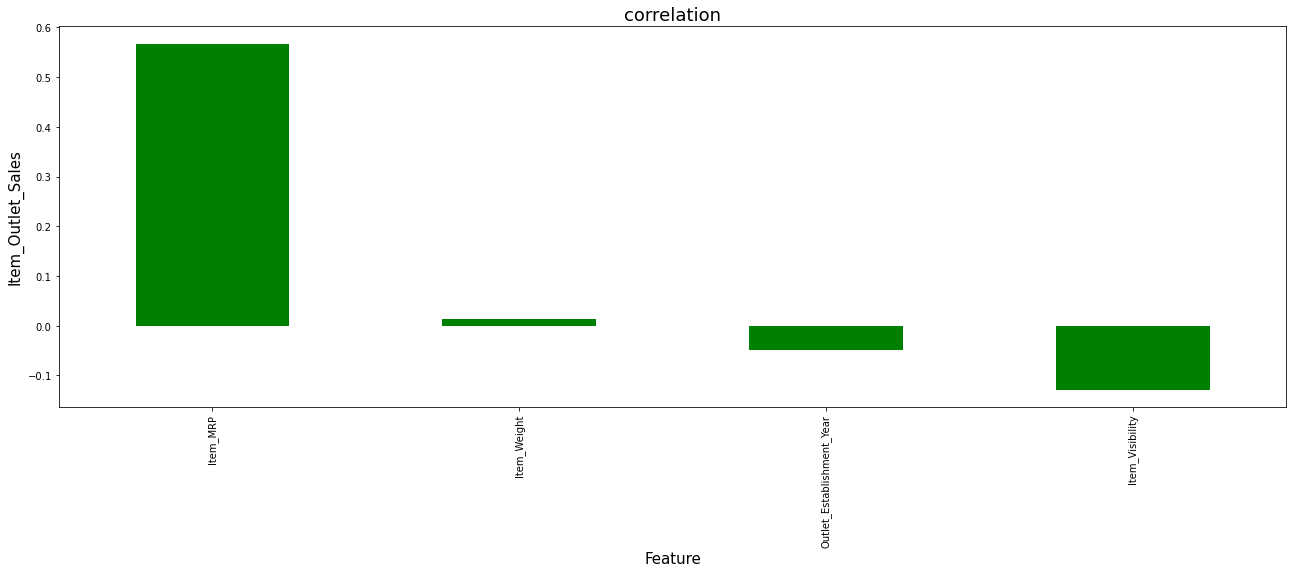

In [18]:
plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

Item_weight column is weekly correlate with targate variable.

After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

In [19]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Encoding and Data Cleaning

# 1.Drop input variable 'Item_Identifier'

In [20]:
df1['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [21]:
df1['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDW26     9
FDF52     9
FDO19     9
         ..
FDQ60     1
FDK57     1
FDO33     1
FDE52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [22]:
#drop Item_Identifier colum
df1=df1.drop(['Item_Identifier'], axis=1)

# 2. Encode input variable Item_Fat_Content

In [23]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.
and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [25]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

In [26]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
# Replace Item_Fat_Content column to binary encoder
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

# 3.encode item type

In [28]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [31]:
df1["Item_Type"] = le.fit_transform(df1["Item_Type"])


In [32]:
df1#label encoding done in item_type

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,0,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,0,0.000000,6,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,1,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,0,0.046982,0,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,1,0.035186,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,0,0.145221,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 4.Outlet_Identifier

In [33]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [35]:
#drop Outlet_Type colum as its just an identifier
df1=df1.drop(['Outlet_Identifier'], axis=1)

In [36]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,1,0.000000,9,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 5.Encode and treat missing values of Outlet_Size

In [37]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [38]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [39]:
# fill null values wih mode
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])

In [40]:
#label encoder
df1["Outlet_Size"] = le.fit_transform(df1["Outlet_Size"].values.reshape(-1,1))

In [41]:
#chk again unique vales
df1['Outlet_Size'].unique()

array([1, 0, 2])

6. Encode Outlet_Location_Type

In [42]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [43]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [44]:
df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])

In [45]:
df1['Outlet_Location_Type'].unique()

array([0, 2, 1])

7. Encode Outlet_Type

In [46]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [47]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [48]:
df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [49]:
df1['Outlet_Type'].unique()

array([1, 2, 0, 3])

# Handle missing value

In [50]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [51]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [52]:
#chking again null values
df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

as we can see now there is no null values present in data

# Lets chk the outliers

Item_Weight                     AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Item_Fat_Content             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Item_Visibility              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Item_Type                    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Item_MRP                     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Outlet_Size                  AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Outlet_Location_Type               AxesSubplot(0.125,0.125;0.0945122x0.343182)
Outlet_Type                     AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Item_Outlet_Sales               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

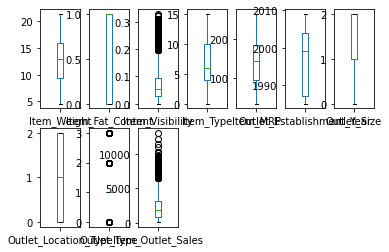

In [53]:
df1.plot(kind='box',subplots=True,layout=(2,7))

as shown in above only 2 columns are contineous in nature and we need to remove outlier or skewness of contineous data.

# Outliers removal

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df1[['Item_Weight','Item_Visibility','Item_MRP']]))
z

array([[0.84187169, 0.97073217, 1.74745381],
       [1.64170589, 0.90811123, 1.48902325],
       [1.09855449, 0.95691733, 0.01004021],
       ...,
       [0.53424315, 0.59978449, 0.89720755],
       [1.33644372, 1.53287976, 0.60797692],
       [0.45963367, 0.41193591, 1.05226104]])

In [55]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  174,  434,  502,  521,  532,  854, 1159, 1272,
       1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805,
       1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728,
       2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750,
       3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4656, 4674, 4789,
       4941, 5031, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891,
       5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005,
       7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744,
       7866, 7949, 8194, 8215, 8273, 8345, 8432]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1]))


In [56]:
df_new1=df1[(z<3).all(axis=1)]

In [57]:
df_new1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [58]:
df_new1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [59]:
#data loss
((8523-8428)/8523)*100

1.1146309984747156

1.114% data loss after using Zscore technique

# Skewness of data 

In [60]:
df_new1.skew()

Item_Weight                  0.089907
Item_Fat_Content            -0.620786
Item_Visibility              0.795956
Item_Type                    0.100953
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.082879
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
Item_Outlet_Sales            1.173070
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column have skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness from that.

# Power transformation

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [61]:
#applying log transformation on skewed columns

df_new1['Item_Visibility'] = df_new1['Item_Visibility'].replace(0,df_new1['Item_Visibility'].mean())


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

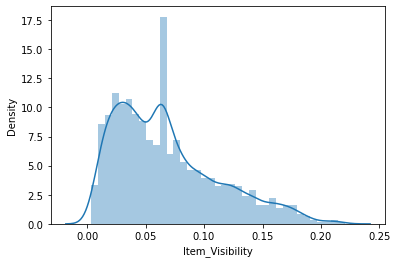

In [62]:
sns.distplot(df_new1['Item_Visibility'])

As shown in plot less skewness present after using power transformation skewness removal technique.

# Now we will work on data set 2

In [63]:
df2=pd.read_csv("bigdatamart_test.csv")
df2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [64]:
df2.shape

(5681, 11)

There are 5681 rows and 11 columns

In [65]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are two columns are having missing data in it.

1.Item_Weight : 976 rows are missing
    
2.Outlet_Size : 1606 rows are missing

<AxesSubplot:>

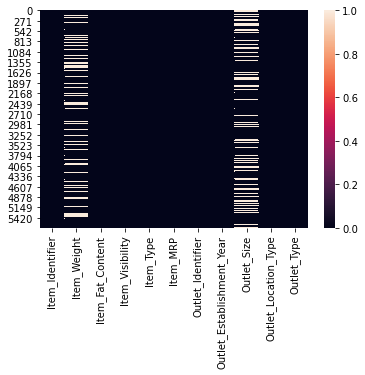

In [66]:
sns.heatmap(df2.isnull())

we can see that item weight and outlet size having null values showing in white spaces

In [67]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP.

and rest is integer data type : Outlet_Establishment_Year,

# EDA (Exploratory Data Analysis) Visualization (Uni Variate analysis)¶

1.Distplot

In [68]:
un = df2[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]]

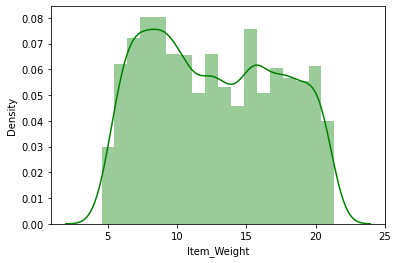

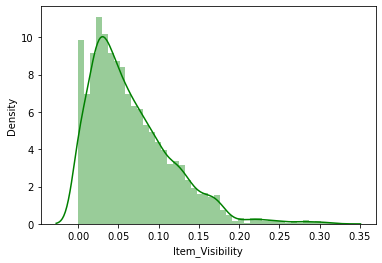

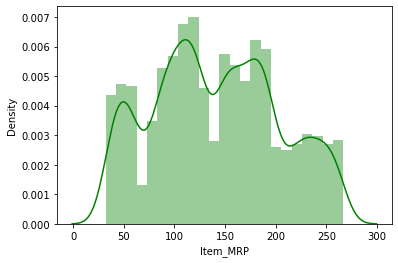

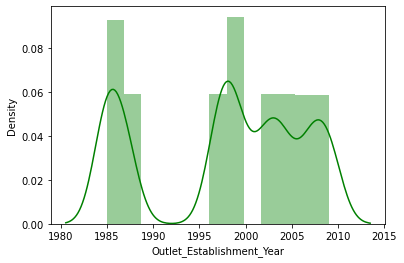

In [69]:
for i in un:
    plt.figure()
    sns.distplot(df2[i],color='g')

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight, Item_MRP and Item_Visibility is having skewness in it.

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it.

2.histplot

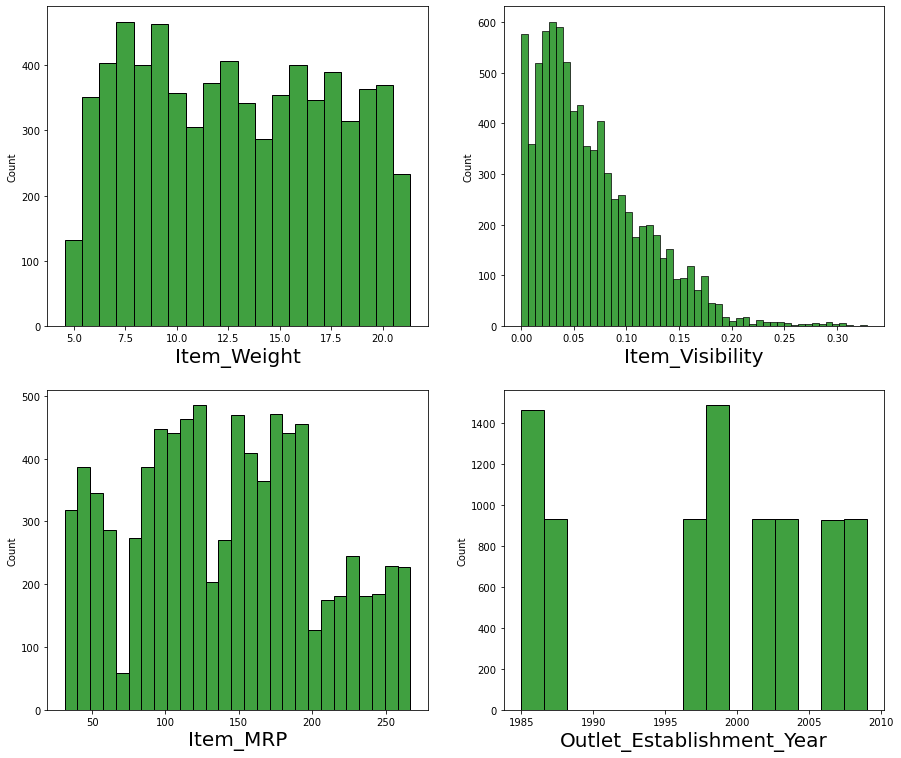

In [70]:
plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for i in un:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(u[i], color = 'g')
        plt.xlabel(i,fontsize=20)
        
    plotnumber += 1
plt.show()

# Multivariate analysis

In [71]:
df2.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.019089,0.049809,0.018918
Item_Visibility,-0.019089,1.000000,-0.014013,-0.097040
Item_MRP,0.049809,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.018918,-0.097040,-0.007233,1.000000


<AxesSubplot:>

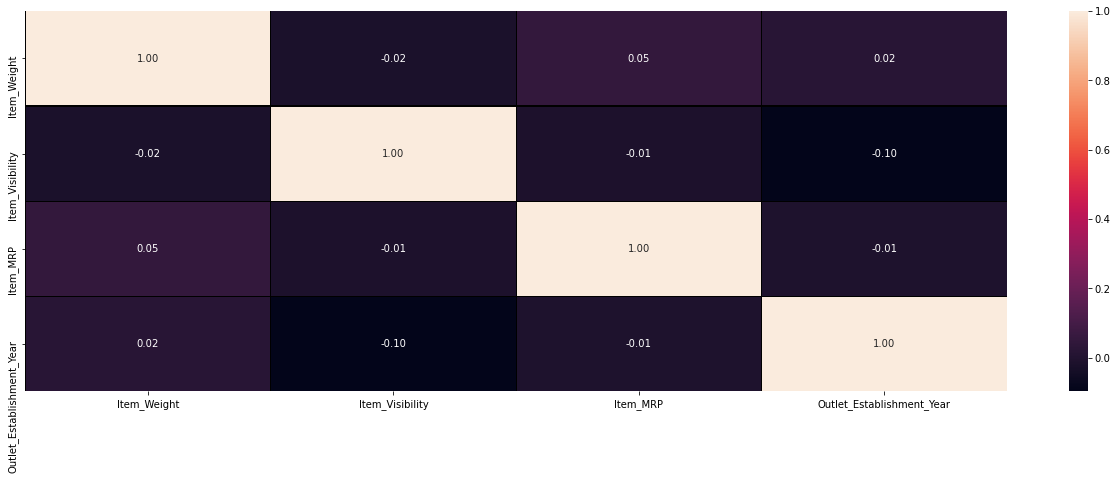

In [72]:
# finding the corelation by heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df2.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

As shown in heatmap Item_Visibility and Outlet_Establishment_Year are strongly correlated with each other and Outlet_Establishment_Year column is weekly correlate with Item_MRP.

In [73]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Encoding, Droping and Missing data handling

1.Drop input variable 'Item_Identifier'

In [74]:
df2['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [75]:
df2['Item_Identifier'].value_counts()

DRF48    8
FDQ60    8
FDP15    8
FDZ50    8
FDK57    8
        ..
FDT49    1
DRD13    1
FDJ21    1
FDV57    1
FDG09    1
Name: Item_Identifier, Length: 1543, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [76]:
#drop Item_Identifier colum
df2=df2.drop(['Item_Identifier'], axis=1)

2. Encode input variable Item_Fat_Content

In [77]:
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [78]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [79]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [80]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [81]:
# Replace Item_Fat_Content column to binary encoder
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

In [82]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,0,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,1,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,1,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,0,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,7.600,0,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,0,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


encoding is showing in item_fat_content

3. Encode Item type

In [83]:
df2['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [84]:
df2['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [86]:
df2["Item_Type"] = le.fit_transform(df2["Item_Type"])

In [87]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,0,0.038428,4,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,1,0.099575,11,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,1,0.015388,13,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,0,0.118599,4,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,13,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,7.600,0,0.142991,15,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,1,0.073529,8,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,0,0.000000,3,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


4.Outlet_Identifier


In [88]:
df2['Outlet_Identifier'].unique()


array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [89]:
#drop Outlet_Type colum as its just an identifier
df2=df2.drop(['Outlet_Identifier'], axis=1)

It is just an identity column so we can drop that column.

In [90]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,0,0.038428,4,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,1,0.099575,11,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,1,0.015388,13,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,0,0.118599,4,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,13,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,0,0.142991,15,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,1,0.073529,8,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,0,0.000000,3,214.6218,2007,NaN,Tier 2,Supermarket Type1


5.Encode and treat missing values of Outlet_Size

In [91]:
df2['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [92]:
df2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [93]:
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

fill values by mode of outlet size

label encoding on column outlet_size

In [94]:
df2["Outlet_Size"] = le.fit_transform(df2["Outlet_Size"].values.reshape(-1,1))


In [95]:
df2['Outlet_Size'].unique()

array([1, 2, 0])

In [96]:
df2 # chking data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,Tier 1,Supermarket Type1
1,8.300,0,0.038428,4,87.3198,2007,1,Tier 2,Supermarket Type1
2,14.600,1,0.099575,11,241.7538,1998,1,Tier 3,Grocery Store
3,7.315,1,0.015388,13,155.0340,2007,1,Tier 2,Supermarket Type1
4,NaN,0,0.118599,4,234.2300,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,13,141.3154,1997,2,Tier 1,Supermarket Type1
5677,7.600,0,0.142991,15,169.1448,2009,1,Tier 3,Supermarket Type2
5678,10.000,1,0.073529,8,118.7440,2002,1,Tier 2,Supermarket Type1
5679,15.300,0,0.000000,3,214.6218,2007,1,Tier 2,Supermarket Type1


6.Encode Outlet_Location_Type


In [97]:
df2['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [98]:
df2['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

label encoding in outlet location column

In [99]:
df2["Outlet_Location_Type"] = le.fit_transform(df2["Outlet_Location_Type"].values.reshape(-1,1))


In [100]:
df2 # chking data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,0,Supermarket Type1
1,8.300,0,0.038428,4,87.3198,2007,1,1,Supermarket Type1
2,14.600,1,0.099575,11,241.7538,1998,1,2,Grocery Store
3,7.315,1,0.015388,13,155.0340,2007,1,1,Supermarket Type1
4,NaN,0,0.118599,4,234.2300,1985,1,2,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,13,141.3154,1997,2,0,Supermarket Type1
5677,7.600,0,0.142991,15,169.1448,2009,1,2,Supermarket Type2
5678,10.000,1,0.073529,8,118.7440,2002,1,1,Supermarket Type1
5679,15.300,0,0.000000,3,214.6218,2007,1,1,Supermarket Type1


7.encoding on outlet_type

In [101]:
df2["Outlet_Type"].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [102]:
df2["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

label encoding on Outlet_Type

In [103]:
df2["Outlet_Type"] = le.fit_transform(df2["Outlet_Type"].values.reshape(-1,1))


In [104]:
df2 #chking data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,0,1
1,8.300,0,0.038428,4,87.3198,2007,1,1,1
2,14.600,1,0.099575,11,241.7538,1998,1,2,0
3,7.315,1,0.015388,13,155.0340,2007,1,1,1
4,NaN,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,0,0.013496,13,141.3154,1997,2,0,1
5677,7.600,0,0.142991,15,169.1448,2009,1,2,2
5678,10.000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300,0,0.000000,3,214.6218,2007,1,1,1


# Handle missing value

In [105]:
#filling missing values in column item_weight by mean of that column
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [106]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,0,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,0,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,0,0.000000,3,214.6218,2007,1,1,1


# Remove outliers


In [107]:
df2.dtypes # datatypes

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

as shown in above only 2 columns are contineous in nature and we need to remove outlier or skewness of contineous data only.

# Outliers removal using zscore

In [108]:
#In Zscore technique taking standard deviation 3
z=np.abs(zscore(df2[['Item_Weight','Item_Visibility','Item_MRP']]))
z

array([[1.89745979, 1.13407715, 0.53655526],
       [1.03552991, 0.53185019, 0.86893692],
       [0.44863355, 0.6613164 , 1.62984753],
       ...,
       [0.63504136, 0.15307374, 0.36048475],
       [0.6135406 , 1.28168987, 1.19084433],
       [0.75283211, 0.76171558, 0.99067406]])

In [109]:
threshold=3
print(np.where(z>3))

(array([  46,   76,   78,   89,  138,  333,  385,  474,  543,  637,  858,
        871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616, 1710,
       1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380, 2393,
       2504, 2516, 2561, 2605, 2609, 2625, 2628, 2677, 2779, 2836, 2843,
       3267, 3294, 3313, 3316, 3346, 3378, 3502, 3638, 3679, 3970, 4052,
       4147, 4159, 4208, 4255, 4328, 4365, 4421, 4575, 4616, 4689, 4801,
       4804, 4846, 4919, 4976, 4999, 5121, 5157, 5277, 5290, 5435, 5469,
       5482, 5514, 5571, 5668]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))


In [110]:
df_new2=df2[(z<3).all(axis=1)]

In [111]:
df_new2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,0,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,0,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,0,0.000000,3,214.6218,2007,1,1,1


In [112]:
df_new2.skew()

Item_Weight                  0.140901
Item_Fat_Content            -0.616007
Item_Visibility              0.787861
Item_Type                    0.091394
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
Outlet_Size                 -0.082542
Outlet_Location_Type        -0.212992
Outlet_Type                  0.953152
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column have skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness from that.

# Apply Power transformation to remove skewness

n log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [113]:
#applying power transformation on skewed columns

df_new2['Item_Visibility'] = df_new2['Item_Visibility'].replace(0,df_new2['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

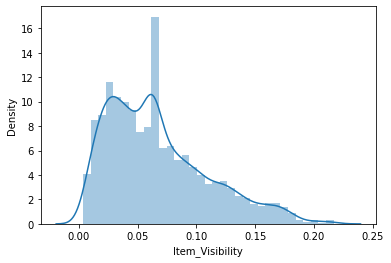

In [114]:
sns.distplot(df_new2['Item_Visibility'])

# Seperating the columns into featuers and target:

In [115]:
x = df_new1.drop(columns = 'Item_Outlet_Sales', axis=1)
y = df_new1['Item_Outlet_Sales']
x1 = df_new2

# Scalling technique

In [116]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)
x1_scalar = ss.fit_transform(x1)

variables are scaled now using standard scaler technique.

# Variance inflation factor

In [117]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.001981,Item_Weight
1,1.022923,Item_Fat_Content
2,1.033226,Item_Visibility
3,1.022868,Item_Type
4,1.001783,Item_MRP
5,1.071717,Outlet_Establishment_Year
6,1.702975,Outlet_Size
7,2.041749,Outlet_Location_Type
8,1.366157,Outlet_Type


In [118]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif["Features"] = x1.columns

#lets check the values
vif

,vif,Features
0,1.004516,Item_Weight
1,1.029566,Item_Fat_Content
2,1.027133,Item_Visibility
3,1.032014,Item_Type
4,1.005893,Item_MRP
5,1.077776,Outlet_Establishment_Year
6,1.702614,Outlet_Size
7,2.049543,Outlet_Location_Type
8,1.364586,Outlet_Type


as we have saw in the table vif value is not greater than 5. so no need to drop any column to avoid multiclinearity issue.

# Finding best random state

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1.Decision Tree regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scalar,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.2494600034428548 on Random_state  170


In [123]:

x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 170)


# 2.Linear Regression Model

In [125]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.47780945943273734



The r2 score of linear model is 47%

# Cross Validation of Linear Regression

In [127]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(lr, x_train, y_train, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5113326515707337

The Accuracy score for Linear regression model is : 47.78%
Cross validation score for Linear regression is : 51.13%

# Regularization- Lasso and Ridge¶

In [128]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
print("r2 score is",r2_score(y_test,pred))

r2 score is 0.47780945943273734


In [129]:
ls.coef_

array([  -2.65885893,  -32.52150975,  -61.00744181,   -1.31930999,
        973.76721833,    2.23541541, -190.93846183, -340.39836839,
        783.66538635])

In [130]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred = rd.predict(x_test)

print("r2 score is",r2_score(y_test,pred))

r2 score is 0.47780640364712446


The r2 score of lasso and ridge is 47.78%

# 3.Random forest regression

In [133]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_test=rfr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5403981338690553


The r2 score of rfr is 54%

# 4.Support vector regressor

In [134]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [135]:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
print(r2_score(y_test,pred_test))

0.0529407342263547


The R2 score of svr is 52%

# Lets chk the cross validation¶

In [136]:
# cross validation of svr model
cv_score= cross_val_score(svr, x_train, y_train, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.03851161435768844

In [137]:
# cross validation of dtr model
cv_score= cross_val_score(dtr, x_train, y_train, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.17922001010650596

In [138]:
cv_score= cross_val_score(rfr, x_train, y_train, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5473969607968827

# as shown in above  Random Forest Regressor is having minimum difference, so Random Forest Regressor is best model

The r2 score of rfr is 54.26% and cross validation is 54.77%

# Hyperparameter Tuning

In [139]:
parameters ={"criterion" :["squared_error", "absolute_error", "poisson"], "max_features":["auto", "sqrt", "log2"]}

In [140]:
rfr= RandomForestRegressor()
clf =GridSearchCV(rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'poisson', 'max_features': 'sqrt'}


In [141]:
Final_mod=RandomForestRegressor(criterion='poisson',max_features= 'sqrt')
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

47.152139084569065


# Saving final model

In [142]:
#saving the final model
import joblib
joblib.dump(dtr,"FinalModel6.pkl")

['FinalModel6.pkl']